In [2]:
# ----------------------------------------------
# 🩺 MEDICAL DATA VISUALIZER 
# ----------------------------------------------

# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load the dataset
df = pd.read_csv(r"C:\Users\ADITHYA\Downloads\medical_examination.csv")

# Display first few rows
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Step 3: Add an 'overweight' column
# BMI = weight (kg) / (height (m))^2
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (df['BMI'] > 25).astype(int)

# Step 4: Normalize cholesterol and glucose
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


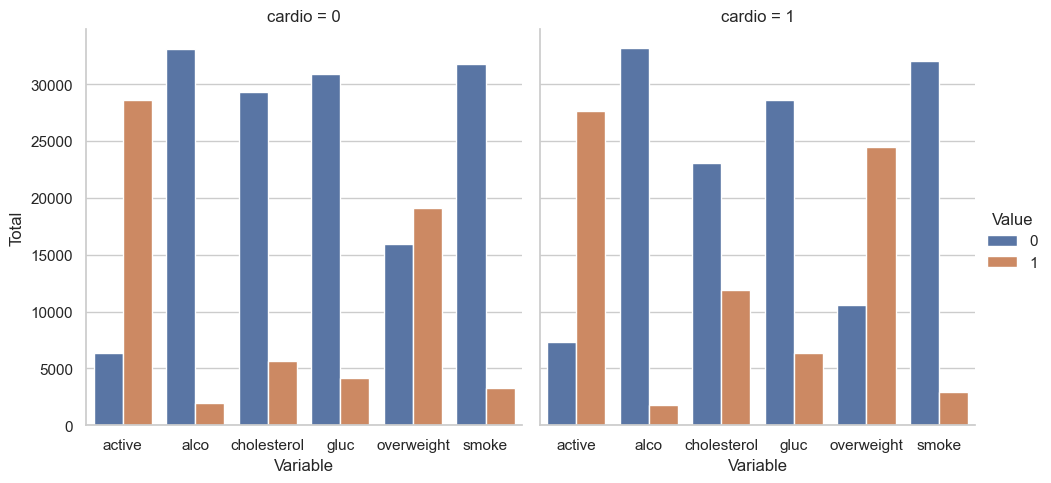

In [4]:
# Step 5: Draw the Categorical Plot
# Convert to long format for seaborn's catplot
df_cat = pd.melt(
    df,
    id_vars=['cardio'],
    value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
)

# Group and reformat data
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

# Draw the catplot
sns.set_theme(style="whitegrid")
catplot = sns.catplot(
    data=df_cat,
    kind='bar',
    x='variable',
    y='total',
    hue='value',
    col='cardio',
    height=5,
    aspect=1
)

catplot.set_axis_labels("Variable", "Total")
catplot._legend.set_title("Value")

plt.show()


In [5]:
# Step 6: Clean the data for the heatmap

# Copy the dataframe
df_heat = df.copy()

# Keep rows where:
# - diastolic <= systolic
# - height within 2.5th–97.5th percentile
# - weight within 2.5th–97.5th percentile
df_heat = df_heat[
    (df_heat['ap_lo'] <= df_heat['ap_hi']) &
    (df_heat['height'] >= df_heat['height'].quantile(0.025)) &
    (df_heat['height'] <= df_heat['height'].quantile(0.975)) &
    (df_heat['weight'] >= df_heat['weight'].quantile(0.025)) &
    (df_heat['weight'] <= df_heat['weight'].quantile(0.975))
]

print("Shape after cleaning:", df_heat.shape)


Shape after cleaning: (63259, 15)


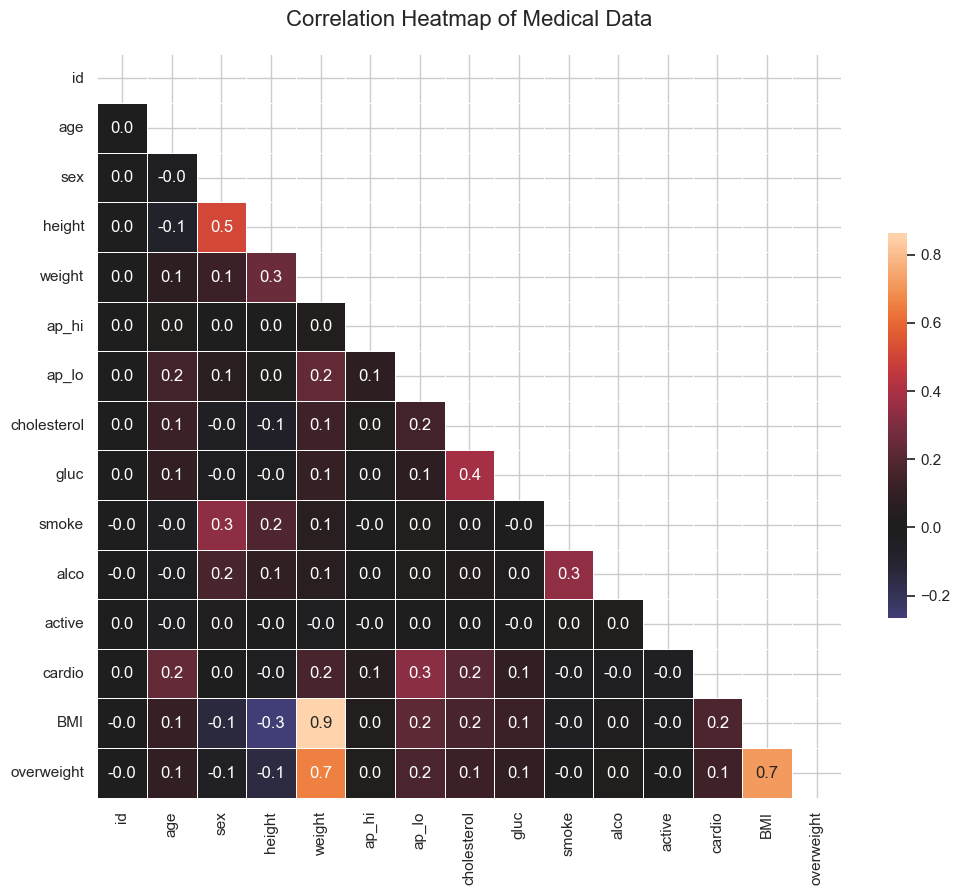

In [6]:
# Step 7: Draw the Heatmap

# Compute correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".1f",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)

plt.title("Correlation Heatmap of Medical Data", fontsize=16, pad=20)
plt.show()
